In [1]:
import numpy as np 
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
# Import f1_score
from sklearn.metrics import f1_score


nlp = spacy.load("en_core_web_sm")

#### Read Data

In [2]:
data=pd.read_csv(("amazon_alexa.tsv"), sep='\t')

data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


#### Visualize ratings

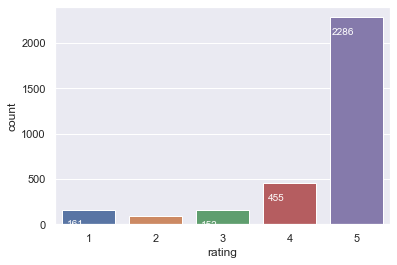

In [3]:
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.countplot(x="rating", data=data)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)

#### visualize feedback

<AxesSubplot:xlabel='feedback', ylabel='count'>

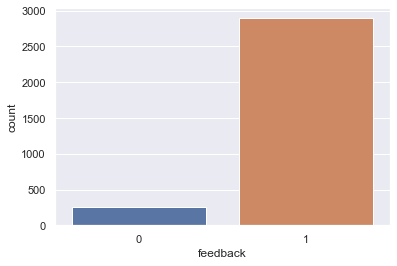

In [4]:
sns.countplot(x="feedback", data=data)

#### Bag of words model created using sklearn counter vectorizer

In [5]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer()
docs = data['verified_reviews']
#
# Fit the bag-of-words model
#
bag = vectorizer.fit_transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer.get_feature_names())
#
# Associate the indices with each unique word
#
print(vectorizer.vocabulary_)
#
# Print the numerical feature vector
#
print(bag.toarray())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Create models to predict feedback using different ML algorithms

### 1. LogisticRegression

In [6]:
#
# Creating training data set from bag-of-words  and dummy label
#
X = bag.toarray()
y = data['feedback']
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
#
# Create training and test split
#

X_train, X_test, y_train, y_test = train_test_split(X, y)
#
# Create an instance of LogisticRegression classifier
#
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
#
# Fit the model
#
lr.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = lr.predict(X_test)
  
# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy %.3f" %metrics.accuracy_score(y_test, y_predict))

# evaluate model using k-fold cross-validation
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(lr, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(lr, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

LogisticRegression Accuracy 0.945


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy when k =05: 0.945 (0.007)
Accuracy when k =10: 0.947 (0.010)


#### Tuning parameters for logistic regression

In [7]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
# grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


#### Select best model for prediction

In [8]:
lr = LogisticRegression(C=10,  random_state=1, solver='liblinear', penalty= 'l2')
#
# Fit the model
#
lr.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = lr.predict(X_test)
  
lr_accuracy = metrics.accuracy_score(y_test, y_predict)
# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy %.3f" %lr_accuracy)
# evaluate model using k-fold cross-validation
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(lr, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(lr, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

LogisticRegression Accuracy 0.945
Accuracy when k =05: 0.946 (0.010)
Accuracy when k =10: 0.948 (0.012)


### 2. K-Nearest Neighbors (KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
#
# Create an instance of KNeighbors classifier
#
knc = KNeighborsClassifier(n_neighbors=1)
#
# Fit the model
#
knc.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = knc.predict(X_test)
  
# Use metrics.accuracy_score to measure the score
print("KNeighborsClassifier Accuracy %.3f" %metrics.accuracy_score(y_test, y_predict))
# evaluate model using k-fold cross-validation
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(knc, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(knc, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

KNeighborsClassifier Accuracy 0.882
Accuracy when k =05: 0.927 (0.012)
Accuracy when k =10: 0.930 (0.015)


#### Tuning parameters for KNeighborsClassifier

In [11]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold
# n_neighbors = range(1, 21, 2)
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']
# # define grid search
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=knc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

#### Select best model for prediction

In [12]:
knc = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, weights='uniform')
#
# Fit the model
#
knc.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = knc.predict(X_test)
  
knc_accuracy = metrics.accuracy_score(y_test, y_predict)
# Use metrics.accuracy_score to measure the score
print("KNeighborsClassifier Accuracy %.3f" %knc_accuracy)
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(knc, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(knc, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

KNeighborsClassifier Accuracy 0.886
Accuracy when k =05: 0.933 (0.014)
Accuracy when k =10: 0.937 (0.017)


### 3. Support Vector Machine (SVM)

In [13]:
from sklearn.svm import SVC
#
# Create an instance of SVC classifier
#
svc = SVC()
#
# Fit the model
#
svc.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = svc.predict(X_test)
  
# Use metrics.accuracy_score to measure the score
print("SVC Accuracy %.3f" %metrics.accuracy_score(y_test, y_predict))
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(svc, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(svc, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

SVC Accuracy 0.910
Accuracy when k =05: 0.923 (0.008)
Accuracy when k =10: 0.925 (0.010)


#### Tuning parameters for SVC

In [14]:
# C = [50, 10, 1.0]
# gamma = ['scale']
# # define grid search
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

#### Select best model for prediction

In [15]:
svc = SVC()
#
# Fit the model
#
svc.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = svc.predict(X_test)
  
svc_accuracy=metrics.accuracy_score(y_test, y_predict)
# Use metrics.accuracy_score to measure the score
print("SVC Accuracy %.3f" %svc_accuracy)
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(svc, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(svc, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

SVC Accuracy 0.910
Accuracy when k =05: 0.923 (0.008)
Accuracy when k =10: 0.925 (0.010)


### 4. Bagged Decision Trees (Bagging)

In [16]:
from sklearn.ensemble import BaggingClassifier
#
# Create an instance of Bagging classifier
#
bc = BaggingClassifier()
#
# Fit the model
#
bc.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = bc.predict(X_test)
  
# Use metrics.accuracy_score to measure the score
print("Bagged Decision Trees Accuracy %.3f" %metrics.accuracy_score(y_test, y_predict))
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(bc, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(bc, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

Bagged Decision Trees Accuracy 0.924
Accuracy when k =05: 0.933 (0.011)
Accuracy when k =10: 0.933 (0.012)


#### Tuning parameters for Bagged Decision Trees

In [17]:
# n_estimators = [10, 100, 1000]
# # define grid search
# grid = dict(n_estimators=n_estimators)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=bc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

#### Select best model for prediction

In [18]:
bc = BaggingClassifier()
#
# Fit the model
#
bc.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = bc.predict(X_test)
  
bc_accuracy=metrics.accuracy_score(y_test, y_predict)
# Use metrics.accuracy_score to measure the score
print("Bagged Decision Trees Accuracy %.3f" %bc_accuracy)
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(bc, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(bc, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

Bagged Decision Trees Accuracy 0.923
Accuracy when k =05: 0.934 (0.014)
Accuracy when k =10: 0.935 (0.013)


### 5. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
#
# Create an instance of RandomForest classifier
#
rfc = RandomForestClassifier()
#
# Fit the model
#
rfc.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = rfc.predict(X_test)
  
# Use metrics.accuracy_score to measure the score
print("Random Forest Classifier Accuracy %.3f" %metrics.accuracy_score(y_test, y_predict))
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

Random Forest Classifier Accuracy 0.925
Accuracy when k =05: 0.932 (0.010)
Accuracy when k =10: 0.938 (0.011)


#### Tuning parameters for Random Forest

In [20]:
# n_estimators = [10, 100, 1000]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

#### Select best model for prediction

In [21]:
rfc = RandomForestClassifier()
#
# Fit the model
#
rfc.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = rfc.predict(X_test)
  
rfc_accuracy=metrics.accuracy_score(y_test, y_predict)
# Use metrics.accuracy_score to measure the score
print("Random Forest Accuracy %.3f" %rfc_accuracy)
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores05_accuracy = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

Random Forest Accuracy 0.926
Accuracy when k =05: 0.933 (0.010)
Accuracy when k =10: 0.938 (0.011)


### Visualize model accuracies


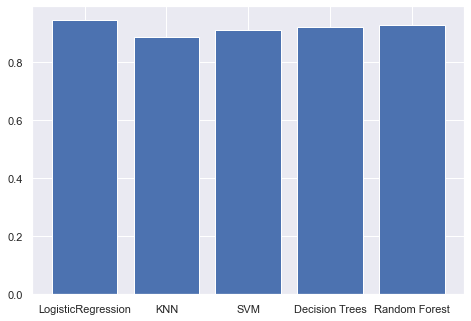

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['LogisticRegression', 'KNN', 'SVM', 'Decision Trees', 'Random Forest']
accuracies = [lr_accuracy,knc_accuracy,svc_accuracy,bc_accuracy,rfc_accuracy]
ax.bar(models,accuracies)
plt.show()

In [23]:
print("Best model is : ", models[accuracies.index(max(accuracies))])

Best model is :  LogisticRegression


#### According to above model accurecies best model is and predict the topic 

#### Predict the topic 

In [37]:
topic_lst = ['device time screen light music sound increase decrease try34 cable',
 'echo good reminder adapter amazon power issue internet regular thing',
 'alexa question simple clock house great product easy computer correct',
 'product wifi music prime listen improvement handy answer setting order',
 'weird noise reason music happy time great speaker conflict echos',
 'love music great size sound echo setup repair spot prime',
 'able home conversation need thing less light love news exact',
 'connection echo issue show internet work slow music item cozi',
 'clock package screen forecast chance large gift birthday damage step',
 'device speaker light thing turn full room sound alexa little',
 'time buying connection stick alexa foot dot room echosecho well',
 'purchasing weather echo news struggle bandwagon day option device lightbulb',
 'light music good thing device smart full feature speaker great',
 'music great time alexa sound wifi component size month many',
 'speaker white option black cord unit volume show tooth alexa',
 'free phone bulb device thing keyboard number purchase good control',
 'philip light bridge time line issue machine firmware support advance',
 'price quality able sound user computer radio work request time',
 'youtube thing feature advantage late start blue fault find big',
 'time amazing disappointing computer occasion microphone show unable push stream',
 'video show amazon fire device love music time thing search',
 'nice product issue good work echo quality time adapter power',
 'time good skill great music product show repair screen firmware',
 'speaker echo music device apartment good well great item love',
 'device many echo sound screen thing money price regular great',
 'basic nest review speech spot upload weather surprised fact software',
 'setup easy device help support friend tech talk yell activated',
 'audio wifi echo speaker device product thing sound buzzing alarm',
 'card regular work echo product time easy much device display',
 'ability love video front yard clock friend couple door capability',
 'screen sound alexa quality device product video useful annoying difference',
 'device time love several video connect echo many play fine',
 'alexa quality device sound prime price internet used difference service',
 'show question home volume device month time overdriven point34 usefulhalf',
 'alexa speaker time touch amazon wifi responsive stick able star',
 'friend good email thing boat time reset problem response install',
 'screen device product thing content amazon instruction audio prime speaker',
 'thing haha smart yesterday night book control brightness light setup',
 'smart alexa music book audible account differentiate need today impressed',
 'device time echo instruction many several aware clear regular sound']

In [39]:
for i in topic_lst:
    y_pred=lr.predict(vectorizer.transform([i]))
    if(y_pred[0]==1):
        print("Topic : ",i," - A Positive")
    else:
         print("Topic : ",i," - A Negative")

Topic :  device time screen light music sound increase decrease try34 cable  - A Positive
Topic :  echo good reminder adapter amazon power issue internet regular thing  - A Positive
Topic :  alexa question simple clock house great product easy computer correct  - A Positive
Topic :  product wifi music prime listen improvement handy answer setting order  - A Positive
Topic :  weird noise reason music happy time great speaker conflict echos  - A Positive
Topic :  love music great size sound echo setup repair spot prime  - A Positive
Topic :  able home conversation need thing less light love news exact  - A Positive
Topic :  connection echo issue show internet work slow music item cozi  - A Negative
Topic :  clock package screen forecast chance large gift birthday damage step  - A Positive
Topic :  device speaker light thing turn full room sound alexa little  - A Positive
Topic :  time buying connection stick alexa foot dot room echosecho well  - A Positive
Topic :  purchasing weather ech